In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

In [2]:
csv_data = "../ETL/sf_df_final.csv"
sf_df = pd.read_csv(csv_data)

In [3]:
cols = ["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs",\
       "furnished", "rent"]
sf_df = sf_df[cols].copy()
sf_df

,neighborhood,br,ba,sqft,housingType,laundry,parking,cats,dogs,furnished,rent
0,Sunset / Parkside,4,2.0,1600.0,apartment,laundry on site,street parking,no,no,no,4200
1,Lower Pac Hts,0,1.0,NaN,apartment,laundry in bldg,attached garage,no,no,no,2850
2,SOMA / South Beach,1,1.0,598.0,apartment,w/d in unit,detached garage,yes,yes,no,3431
3,Lower Pac Hts,1,1.0,915.0,apartment,w/d in unit,attached garage,no,no,no,3795
4,Ingleside / SFSU / CCSF,1,1.0,NaN,apartment,no laundry on site,street parking,no,no,no,2000
...,...,...,...,...,...,...,...,...,...,...,...
2591,North Beach / Telegraph Hill,1,1.0,NaN,apartment,laundry in bldg,attached garage,no,no,no,2495
2592,Nob Hill,1,1.0,NaN,apartment,laundry in bldg,street parking,no,no,no,2395
2593,Mission District,1,1.0,NaN,apartment,no laundry on site,street parking,no,no,no,2350
2594,Russian Hill,0,1.0,NaN,apartment,laundry in bldg,street parking,no,no,no,1995


In [4]:
sf_df.describe()

,br,ba,sqft,rent
count,2596.000000,2596.000000,1227.000000,2596.000000
mean,1.417951,1.211287,852.565607,3007.330123
std,1.095361,0.444560,405.451684,1187.119637
min,0.000000,1.000000,8.000000,650.000000
25%,1.000000,1.000000,566.000000,2190.000000
50%,1.000000,1.000000,775.000000,2795.000000
75%,2.000000,1.000000,1089.000000,3688.500000
max,8.000000,4.000000,3700.000000,7995.000000


In [5]:
# replace Nan values in miami_df['sqft']
sf_df['sqft'] = sf_df['sqft'].apply(str)
sf_df.loc[sf_df['sqft'].str.contains('nan'), 'sqft'] = "0"
sf_df['sqft'] = pd.to_numeric(sf_df['sqft'])
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  2596 non-null   object 
 1   br            2596 non-null   int64  
 2   ba            2596 non-null   float64
 3   sqft          2596 non-null   float64
 4   housingType   2596 non-null   object 
 5   laundry       2596 non-null   object 
 6   parking       2596 non-null   object 
 7   cats          2596 non-null   object 
 8   dogs          2596 non-null   object 
 9   furnished     2596 non-null   object 
 10  rent          2596 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 223.2+ KB


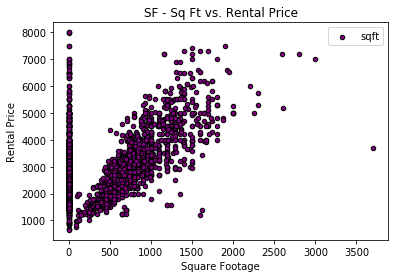

In [6]:
plt.figure()
plt.scatter(sf_df['sqft'],sf_df['rent'], s=20, edgecolor="black",c="purple", label="sqft")
plt.xlabel("Square Footage")
plt.ylabel("Rental Price")
plt.title("SF - Sq Ft vs. Rental Price")
plt.legend()
plt.show()

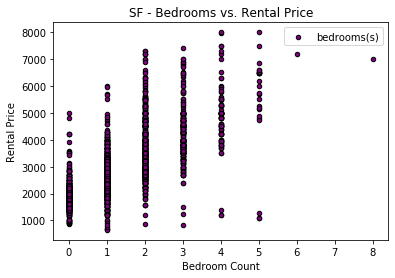

In [7]:
plt.figure()
plt.scatter(sf_df['br'],sf_df['rent'], s=20, edgecolor="black",c="purple", label="bedrooms(s)")
plt.xlabel("Bedroom Count")
plt.ylabel("Rental Price")
plt.title("SF - Bedrooms vs. Rental Price")
plt.legend()
plt.show()

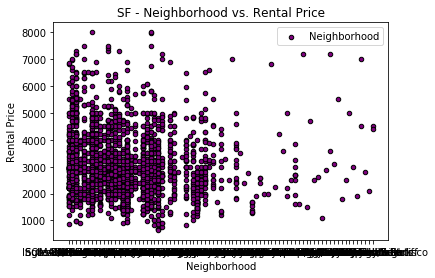

In [8]:
plt.figure()
plt.scatter(sf_df['neighborhood'],sf_df['rent'], s=20, edgecolor="black",c="purple", label="Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Rental Price")
plt.title("SF - Neighborhood vs. Rental Price")
plt.legend()
plt.show()

In [9]:
def getCorrelatedFeature(corrMatrix, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrMatrix.index):
        if abs(corrMatrix[index]) > threshold:
            feature.append(index)
            value.append(corrMatrix[index])
            
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df

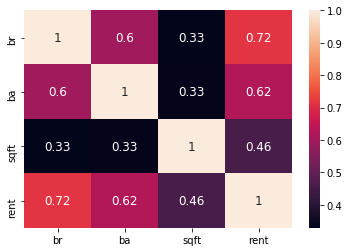

In [10]:
import seaborn as sn
## keep only numerical columns
X_1 = sf_df[["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs", "furnished", "rent"]]
## correlation matrix
corrMatrix = X_1.corr()
## visualize it in a heatmap
sn.heatmap(corrMatrix, annot=True, annot_kws={'size': 12})
plt.show()

In [11]:
threshold = 0.40
corr_value = getCorrelatedFeature(corrMatrix['rent'], threshold)
corr_value

,Corr Value
br,0.715986
ba,0.623907
sqft,0.457373
rent,1.000000


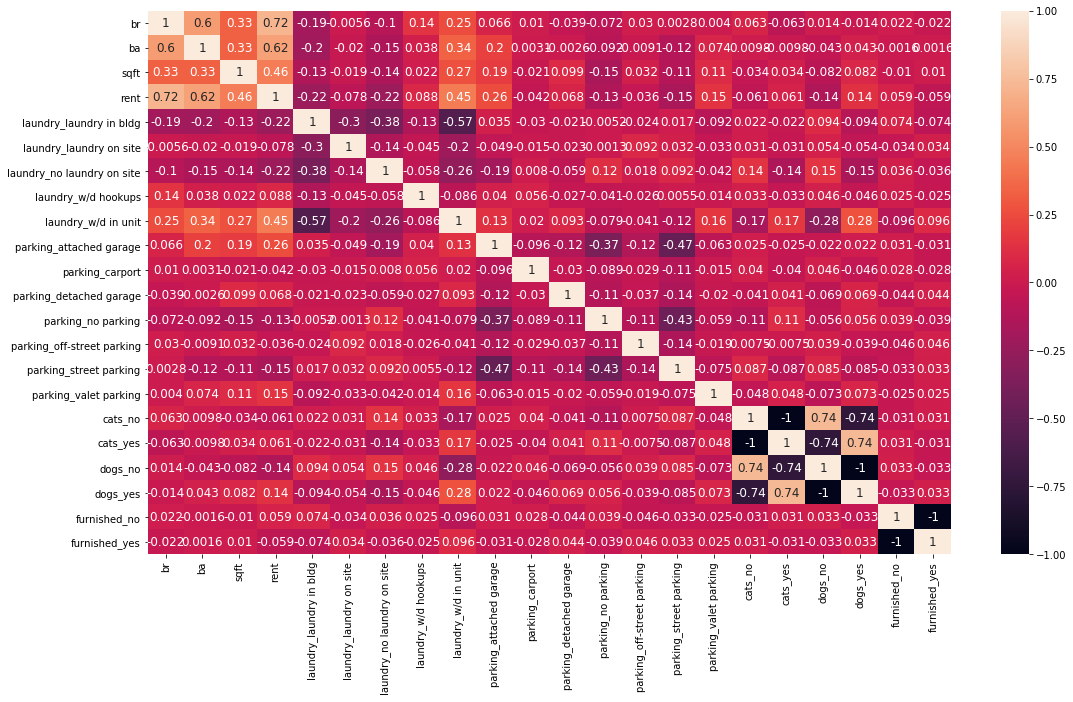

In [12]:
import seaborn as sn
## keep only numerical columns
X_2 = pd.get_dummies(sf_df[["br", "ba", "sqft", "laundry", "parking", "cats", "dogs", "furnished", "rent"]])
## correlation matrix
corrMatrix = X_2.corr()
## visualize it in a heatmap
fig, ax = plt.subplots(figsize = (18,10))
sn.heatmap(corrMatrix, annot=True, annot_kws={'size': 12})
plt.show()

In [13]:
threshold = 0.40
corr_value = getCorrelatedFeature(corrMatrix['rent'], threshold)
corr_value

,Corr Value
br,0.715986
ba,0.623907
sqft,0.457373
rent,1.000000
laundry_w/d in unit,0.445580


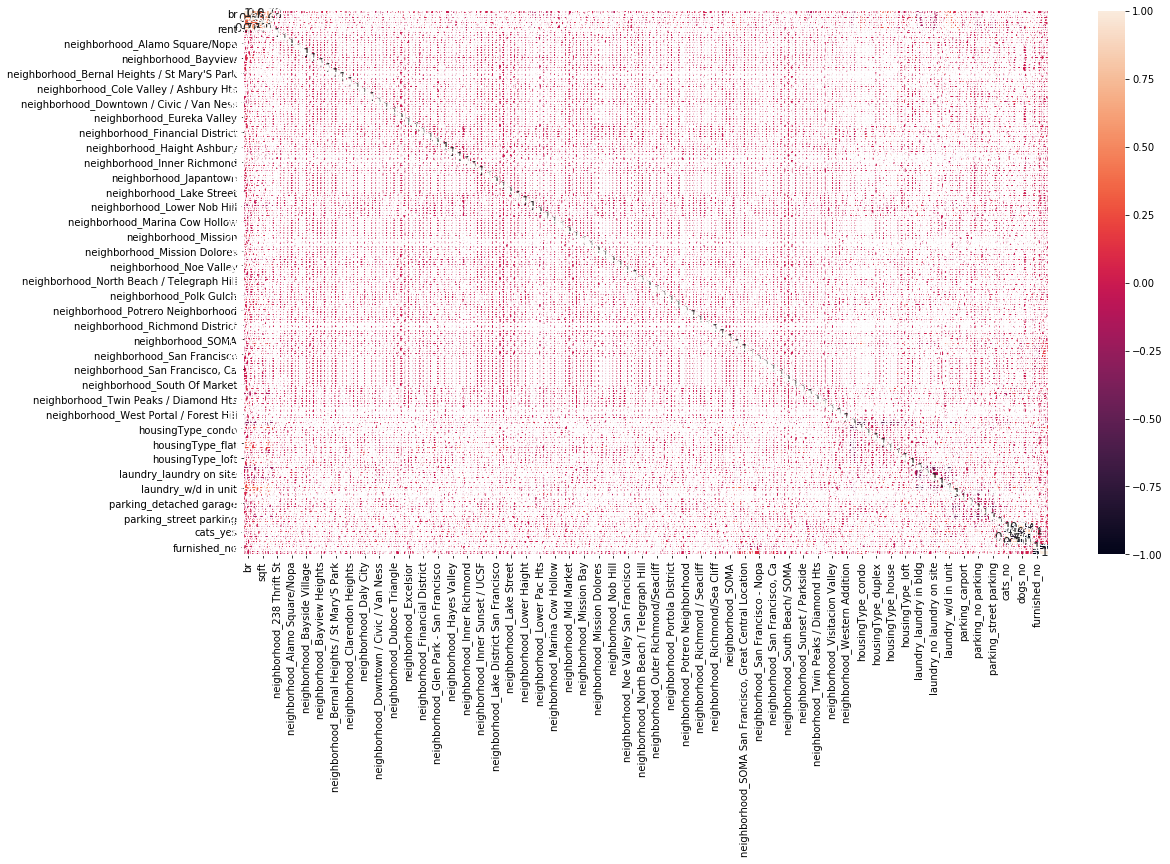

In [14]:
import seaborn as sn
## keep only numerical columns
X_3 = pd.get_dummies(sf_df)
## correlation matrix
corrMatrix = X_3.corr()
## visualize it in a heatmap
fig, ax = plt.subplots(figsize = (18,10))
sn.heatmap(corrMatrix, annot=True, annot_kws={'size': 12})
plt.show()

In [15]:
threshold = 0.30
corr_value = getCorrelatedFeature(corrMatrix['rent'], threshold)
corr_value

,Corr Value
br,0.715986
ba,0.623907
sqft,0.457373
rent,1.000000
laundry_w/d in unit,0.445580


In [16]:
corr_value.index

Index(['br', 'ba', 'sqft', 'rent', 'laundry_w/d in unit'], dtype='object')

In [17]:
# correlated_data = pd.get_dummies(miami_df[["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs", "furnished"]])

# correlated_data = X_3[['br', 'ba', 'sqft', 'neighborhood_Brickell',
#        'housingType_apartment', 'laundry_no laundry on site',
#        'laundry_w/d in unit', 'parking_attached garage']]
# correlated_data

## Data Preprocessing

In [18]:
X = pd.get_dummies(sf_df[["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs", "furnished"]])
y = sf_df["rent"].values.reshape(-1, 1)
print(X.shape, y.shape)
X

(2596, 109) (2596, 1)


,br,ba,sqft,neighborhood_238 Thrift St,neighborhood_Alamo Square / Nopa,neighborhood_Alamo Square/Nopa,neighborhood_Anza Vista,neighborhood_Bayside Village,neighborhood_Bayview,neighborhood_Bayview Heights,...,parking_no parking,parking_off-street parking,parking_street parking,parking_valet parking,cats_no,cats_yes,dogs_no,dogs_yes,furnished_no,furnished_yes
0,4,2.0,1600.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,0,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,1,1.0,598.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1,1.0,915.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,1,1.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,1,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2592,1,1.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2593,1,1.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2594,0,1.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [19]:
target = np.array(sf_df['rent'])
features = X
feature_list = list(features.columns)
features = np.array(features)

## RANDOM FOREST - KFOLD AND MODEL 

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
mse_ = []
r2_ = []

for train_index, test_index in kf.split(features):

    X_train   = features[train_index]
    y_train = target[train_index]

    X_test    = features[test_index]
    y_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(X_train, y_train)

    predictions = rf.predict(X_test)

    errors = abs(predictions - y_test)

#     print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
#     print('Accuracy:', round(accuracy, 2), '%')
    
    MSE = mean_squared_error(y_test, predictions)
    r2 = rf.score(X_test, y_test)
    print(f'MSE: {round(MSE, 2)}')
    print(f'R2: {round(r2, 2)}')
    print('------------------')

    accuracies.append(accuracy)
    mse_.append(MSE)
    r2_.append(r2)

average_accuracy = np.mean(accuracies)
average_mse = np.mean(mse_)
average_r2 = np.mean(r2_)
# print('Average accuracy:', average_accuracy)
print('Average MSE:', average_mse)
print('Average R2:', average_r2)

MSE: 317483.66
R2: 0.74
------------------
MSE: 261141.79
R2: 0.83
------------------
MSE: 370160.96
R2: 0.74
------------------
MSE: 279763.51
R2: 0.77
------------------
MSE: 422935.21
R2: 0.71
------------------
MSE: 317764.25
R2: 0.73
------------------
MSE: 269698.03
R2: 0.8
------------------
MSE: 405088.64
R2: 0.74
------------------
MSE: 340422.37
R2: 0.76
------------------
MSE: 374241.89
R2: 0.76
------------------
Average MSE: 335870.031025604
Average R2: 0.7597754199929799


In [20]:
ARMSE = np.sqrt(average_mse)
ARMSE

579.5429501129352

In [21]:
# Hyperparameter Tuning the Random Forest

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}


In [32]:
# go back to the original code and include new parameters

## RANDOM FOREST - KFOLD AND MODEL 

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
mse_ = []
r2_ = []

for train_index, test_index in kf.split(features):

    X_train = features[train_index]
    y_train = target[train_index]

    X_test = features[test_index]
    y_test = target[test_index]

    rf2 = RandomForestRegressor(n_estimators = 600, 
                               random_state = 42, 
                               criterion = 'mse',
                               min_samples_leaf = 1,
                               min_samples_split = 5,
                               max_features = 'sqrt',
                               bootstrap = False,
                               max_depth = 60)
    
    rf2.fit(X_train, y_train)

    predictions = rf2.predict(X_test)

    errors = abs(predictions - y_test)

#     print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
#     print('Accuracy:', round(accuracy, 2), '%')
    
    MSE = mean_squared_error(y_test, predictions)
    r2 = rf2.score(X_test, y_test)
    print(f'MSE: {round(MSE, 2)}')
    print(f'R2: {round(r2, 2)}')
    print('------------------')

    accuracies.append(accuracy)
    mse_.append(MSE)
    r2_.append(r2)

average_accuracy = np.mean(accuracies)
average_mse = np.mean(mse_)
average_r2 = np.mean(r2_)
# print('Average accuracy:', average_accuracy)
print('Average MSE:', average_mse)
print('Average R2:', average_r2)

MSE: 291325.9
R2: 0.76
------------------
MSE: 285909.05
R2: 0.82
------------------
MSE: 330971.33
R2: 0.77
------------------
MSE: 271837.71
R2: 0.78
------------------
MSE: 414226.57
R2: 0.72
------------------
MSE: 287852.74
R2: 0.75
------------------
MSE: 264530.78
R2: 0.81
------------------
MSE: 377329.58
R2: 0.76
------------------
MSE: 338645.43
R2: 0.77
------------------
MSE: 355397.7
R2: 0.77
------------------
Average MSE: 321802.6793735611
Average R2: 0.7703251121795212


In [33]:
RMSE = np.sqrt(average_mse)
RMSE

567.2765457636699

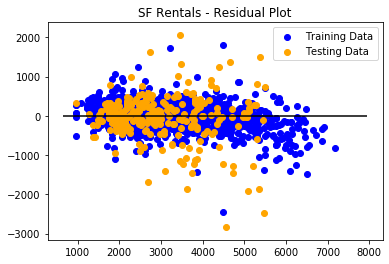

In [34]:
plt.scatter(rf2.predict(X_train), rf2.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(rf2.predict(X_test), rf2.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("SF Rentals - Residual Plot")
plt.show()

In [35]:
preds2 = rf2.predict(X_test)

df2 = pd.DataFrame({'Predicted': preds2, 'Actual': y_test, 'Abs Error': errors})
df2

,Predicted,Actual,Abs Error
0,1892.201528,2850,957.798472
1,4193.482500,4161,32.482500
2,3711.298333,3165,546.298333
3,2119.985278,1995,124.985278
4,4401.420417,3150,1251.420417
...,...,...,...
254,2753.233750,2295,458.233750
255,1784.722639,1550,234.722639
256,1873.075139,1895,21.924861
257,3446.631250,4595,1148.368750


In [36]:
# make predictions

# create a new dataframe that is indexed like the trained model
newdata = pd.DataFrame().reindex_like(X)
newdata = pd.DataFrame(newdata, index=[0])
newdata.fillna(value=0, inplace=True)

# insert information about your apartment 
newdata['br'] = 1
newdata['ba'] = 1
newdata['sqft'] = 660

rf.predict(newdata)

array([2487.908])

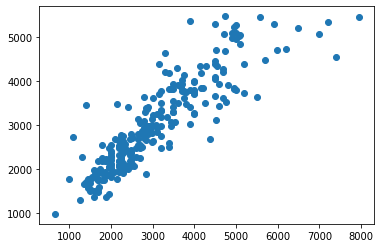

In [41]:
plt.scatter(y_test, preds2)

In [38]:
# get feature importances
importance = rf2.feature_importances_

feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} : {}'.format(X.columns[index], (importance[index] )))

neighborhood_Bayside Village : 0.0
neighborhood_Eureka Valley : 0.0
neighborhood_Anza Vista : 6.790271545154843e-06
neighborhood_Masonic Nr Hayes : 9.532897218424049e-06
neighborhood_SOMA San Francisco, Great Central Location : 1.024495680762492e-05
neighborhood_Nopa / Alamo Square : 1.3093491614246136e-05
neighborhood_Richmond/Sea Cliff : 1.3967184526084815e-05
neighborhood_San Francisco - Nopa : 1.4927567213242124e-05
neighborhood_Duboce Avenue, Pearl Street, Market And Castro : 2.4345974369207576e-05
neighborhood_Inner Richmond, San Francisco : 2.792420381730719e-05
neighborhood_Richmond District : 2.910534369043404e-05
neighborhood_Lake Street : 2.94755795044265e-05
neighborhood_Designer District : 3.4220758063550945e-05
neighborhood_Japantown : 3.4235645820727856e-05
neighborhood_Lake District San Francisco : 3.42965544608525e-05
neighborhood_Mid Market : 3.596997414507967e-05
neighborhood_Marina Cow Hollow : 4.027666113037442e-05
neighborhood_Glen Park - San Francisco : 4.4108703

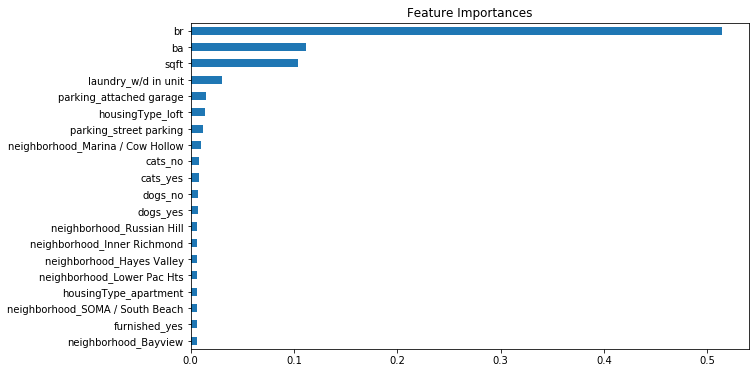

In [30]:
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
feat_importances = pd.Series(importance, index=X.columns)
# feat_importances.sort_values(ascending = True).plot(kind="barh", color="Blue")
feat_importances.nlargest(20).sort_values(ascending = True).plot(kind='barh') # top 20 features only